In [1]:
import sys
sys.path.append('../')
sys.path.append('../support/')
sys.path.append('../lung_segmentation/')
import os
import SimpleITK
from lung_separation import *
from ct_reader import *
from os.path import join, basename, isfile
from glob import glob
from scipy.ndimage import morphology
from skimage import filters
from skimage import exposure
from tqdm import tqdm
from skimage import morphology as skm
from skimage.morphology import watershed
from scipy.ndimage import label
from scipy.ndimage import generate_binary_structure
from skimage import measure
from multiprocessing import Pool
import pickle
from pure_ws_segmentation import *
from numpy import *
# import warnings
# warnings.filterwarnings('ignore')

import SimpleITK as sitk
from paths import * 
from skimage.transform import resize



In [4]:

erroneus = sorted(list(set(pickle.load(open(join(PATH['STAGE_MASKS'], 'erroneus.pkl'), 'rb')))))
erroneus = [join(PATH['STAGE_DATA'],err) for err in erroneus]
path = erroneus[0]
ct_scan = read_ct_scan(path)
ct_scan_px = get_pixels_hu(ct_scan)
# start = time.time()


with Pool(34) as pool:
    ct_excluded = pool.map(exclude_lungs, ct_scan_px)

# end = time.time()
# print(end - start)

# for err in erroneus[:1]:
#     operate(err)


In [ ]:

lung_filter = asarray(ct_excluded)
left, right = separate_lungs3d(lung_filter)
# save(join(join(PATH['STAGE_MASKS'],'FIXED'),basename(path)),left+2*right)


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
where(lung_filter==128)

(array([  0,   0,   0, ..., 204, 204, 204]),
 array([  0,   0,   0, ..., 511, 511, 511]),
 array([  0,   1,   2, ..., 509, 510, 511]))

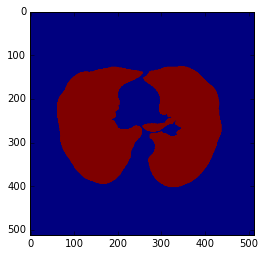

In [14]:
plt.imshow(lung_filter[80])